#Projeto 1: Análise de Dados e Modelos de Predição

Importando as bibliotecas e lendo datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
ds_treino = pd.read_csv('train.csv')
ds_teste = pd.read_csv('test.csv')

In [4]:
ds_treino.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1.0,48,3.0,17,0,NaN,0
54804,74592,Operations,region_27,Master's & above,f,other,1.0,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1.0,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1.0,29,1.0,2,0,45.0,0
54807,51526,HR,region_22,Bachelor's,m,other,1.0,27,1.0,5,0,49.0,0


In [5]:
ds_teste.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1.0,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1.0,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1.0,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,NaN,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1.0,30,4.0,7,0,61


Juntaremos os datasets, para facilitar a limpeza de dados

In [6]:
ds = pd.concat([ds_treino, ds_teste], ignore_index = True)
#Lembrar que o employee_id da última linha do dataset de treino é 51526 e o primeiro do de teste é 8724
#Importante na hora de separar 
#Obs. Não sei se tinha um jeito mais fácil de separar os datasets 

##Limpeza de Dados

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       71379 non-null  float64
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    70840 non-null  float64
 12  is_promoted           54808 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 7.8+ MB


In [8]:
ds.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,78298.000000,71379.000000,78298.000000,72362.000000,78298.000000,78298.000000,70840.000000,54808.000000
mean,39149.500000,1.256672,201.898120,3.332219,5.848974,0.023053,63.430957,0.085170
std,22602.830026,0.610376,4538.125963,1.260982,4.248070,0.150073,13.465914,0.279137
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


###Dados duplicados

Vamos assumir que todas as features podem ter valores duplicados, menos a de "employee_id", já que ela identifica cada um dos empregados individualmente, assim, não podendo ter valores duplicados. Ou seja, mesmo que duas observações possuam os mesmos valores em todas as features, se o "employee_id" for diferente, não será considerado um problema.

In [9]:
duplicatas = ds['employee_id'].duplicated()
ds[duplicatas]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted


Vemos, no entanto, que não existem duplicatas nessa coluna do dataset, de modo que não será necessária nenhuma modificação

Como não existem duplicadas, utilizaremos o emplyee id como index do dataset, para poder trabalhá-lo de maneira mais eficiente

In [10]:
ds = ds.set_index('employee_id')

###Dados Nulos

Iremos retirar as linhas que possuem muitas features nulas, uma vez que imputar valores poderia causar um desequilíbrio no dataset.

In [11]:
tam_antes = ds.shape[0]
tam_agr = ds.dropna(thresh=9).shape[0]
print(f'{tam_antes-tam_agr} linhas foram removidas, ou seja, {(tam_antes-tam_agr)*100/(tam_antes)}% do dataset')

38 linhas foram removidas, ou seja, 0.04853252956652788% do dataset


In [12]:
tam_antes = ds.shape[0]
tam_agr = ds.dropna(thresh=10).shape[0]
print(f'{tam_antes-tam_agr} linhas foram removidas, ou seja, {(tam_antes-tam_agr)*100/(tam_antes)}% do dataset')

900 linhas foram removidas, ou seja, 1.1494546476282919% do dataset


In [13]:
tam_antes = ds.shape[0]
tam_agr = ds.dropna(thresh=11).shape[0]
print(f'{tam_antes-tam_agr} linhas foram removidas, ou seja, {(tam_antes-tam_agr)*100/(tam_antes)}% do dataset')

9989 linhas foram removidas, ou seja, 12.757669416843342% do dataset


Vê-se que o limiar de features nulas ideal para remover as linhas é 10, uma vez que representa aproximadamente 1% do dataset.

In [14]:
ds = ds.dropna(thresh=10)

###Features *categóricas*

####Problemas de classificação

Ainda que as features "awards_won?" e "is_promoted" sejam categóricas, optou-se por não transformá-las em função da elaboração de modelos de predição que serão elaborados futuramente.

####"Department"

In [15]:
print("'department' column unique values:")
print(pd.Series(ds.department.unique()), end='\n\n')

'department' column unique values:
0     Sales & Marketing
1            Operations
2            Technology
3             Analytics
4                   R&D
5           Procurement
6               Finance
7                    HR
8                 Legal
9    quem trouxe quenga
dtype: object



Vemos que dentro dos valores unicos da feature "department" existe um que não se encaixa, no caso, "quem trouxe quenga". 

In [16]:
ds_quenga = ds[ds['department'] == 'quem trouxe quenga']
print(ds_quenga.shape[0]) #Quantas linhas possuem este valor

32


Como poucas linhas possuem tal valor inconsistente, iremos removê-las. Não é possível substituir os valores inconsistentes pois existem muitas categorias a serem consideradas.

In [17]:
obs_dpt_inconsist = ds['department'].isin({'quem trouxe quenga'}) #Definindo as observações que possuem tais valores
ds = ds[~obs_dpt_inconsist] #Dropando as linhas

Novos valores:

In [18]:
print("'department' column unique values:")
print(pd.Series(ds.department.unique()), end='\n\n')

'department' column unique values:
0    Sales & Marketing
1           Operations
2           Technology
3            Analytics
4                  R&D
5          Procurement
6              Finance
7                   HR
8                Legal
dtype: object



####"Region"

In [19]:
print("'region' column unique values:")
ds.region.unique()

'region' column unique values:


array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18',
       'casa da lu na suecia'], dtype=object)

In [20]:
ds_casa = ds[ds['region'] == 'casa da lu na suecia']
print(ds_casa.shape[0])

6


In [21]:
obs_region_inconsist = ds['region'].isin({'casa da lu na suecia'})#Observações que contém tal valor inconsistente
#Dropando as linhas que contém este valor. Como são apenas 6 não fará diferença na análise. Além disso, já que existem muitas regiões diferentes, não faz sentido substiuir o valor por outro.
ds = ds[~obs_region_inconsist]

Novos valores

In [22]:
print("'region' column unique values:")
ds.region.unique()

'region' column unique values:


array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

####"Education"

In [23]:
print("'education' column unique values:")
print(pd.Series(ds.education.unique()), end='\n\n')

'education' column unique values:
0    Master's & above
1          Bachelor's
2                 NaN
3     Below Secondary
dtype: object



In [24]:
ds['education'].isnull().sum()

2896

In [25]:
ds.groupby('education').count()

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
education,,,,,,,,,,,
Bachelor's,51983,51983,51983,51983,48146,51983,47543,51983,51983,47513,36481
Below Secondary,1065,1065,1065,1065,910,1065,679,1065,1065,955,726
Master's & above,21416,21416,21416,21416,19217,21416,21223,21416,21416,19170,14918


Como existem muitos missing values, simplesmente dropá-los não é uma opção viável. Desse modo, optou-se por substituí-los pela moda, no caso "Bachelor's".

In [26]:
ds = ds.fillna(value={'education': "Bachelor's"})

In [27]:
ds['education'].isnull().sum()

0

Novos valores

In [28]:
print("'education' column unique values:")
print(pd.Series(ds.education.unique()), end='\n\n')

'education' column unique values:
0    Master's & above
1          Bachelor's
2     Below Secondary
dtype: object



####"Gender"

In [29]:
print("'gender' column unique values:")
print(pd.Series(ds.gender.unique()), end='\n\n')

'gender' column unique values:
0                                   f
1                                   m
2                                MALE
3                              fEMALE
4    eu sou homem hetero homossexual!
dtype: object



Vemos claramente que existem valores redundantes e um outro que não faz sentido com a feature

Colapsando categorias de dados: MALE -> m, fEMALE -> f

In [30]:
generos = {'MALE': 'm', 'fEMALE': 'f'}
ds['gender'] = ds['gender'].replace(generos)
ds['gender'].unique()

array(['f', 'm', 'eu sou homem hetero homossexual!'], dtype=object)

In [31]:
ds.groupby('gender').count()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
gender,,,,,,,,,,,
eu sou homem hetero homossexual!,224,224,224,224,224,224,218,224,224,224,224
f,22472,22472,22472,22472,16281,22472,21208,22472,22472,17508,15807
m,54664,54664,54664,54664,54664,54664,50568,54664,54664,52691,38230


Ainda que se pudesse assumir que a classificação "eu sou homem hetero homossexual!" poderia ser substituida por "m", de masculino, preferiu-se deletar as linhas em vista da sua pequena quantidade, não correndo o risco de classificá-las erroneamente.

In [32]:
eu_sou = ds['gender'].isin(['eu sou homem hetero homossexual!'])
ds = ds[~eu_sou]

Novos valores

In [33]:
ds['gender'].unique()

array(['f', 'm'], dtype=object)

###Features Numéricas

In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77136 entries, 65438 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            77136 non-null  object 
 1   region                77136 non-null  object 
 2   education             77136 non-null  object 
 3   gender                77136 non-null  object 
 4   recruitment_channel   77136 non-null  object 
 5   no_of_trainings       70945 non-null  float64
 6   age                   77136 non-null  int64  
 7   previous_year_rating  71776 non-null  float64
 8   length_of_service     77136 non-null  int64  
 9   awards_won?           77136 non-null  int64  
 10  avg_training_score    70199 non-null  float64
 11  is_promoted           54037 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 7.7+ MB


In [35]:
ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,70945.000000,77136.000000,71776.000000,77136.000000,77136.000000,70199.000000,54037.000000
mean,1.257199,188.461250,3.334039,5.876517,0.022726,63.435975,0.085441
std,0.611196,4351.406808,1.261410,4.235752,0.149030,13.462622,0.279540
min,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


####Problemas de classificação

####"Number of trainings"

In [36]:
print("'no_of_trainings' column unique values:")
print(pd.Series(ds.no_of_trainings.unique()).sort_values(), end='\n\n')

'no_of_trainings' column unique values:
0      1.0
1      2.0
3      3.0
4      4.0
6      5.0
7      6.0
5      7.0
8      8.0
10     9.0
9     10.0
2      NaN
dtype: float64



In [37]:
ds['no_of_trainings'].isnull().sum()

6191

Vemos que esta feature possui muitos valores nulos, assim, iremos subtituí-los pela mediana da feature, que no caso é 1.

In [38]:
no_med = ds['no_of_trainings'].median()
ds['no_of_trainings'] = ds['no_of_trainings'].fillna(no_med)

In [39]:
ds['no_of_trainings'].isnull().sum()

0

In [40]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77136 entries, 65438 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            77136 non-null  object 
 1   region                77136 non-null  object 
 2   education             77136 non-null  object 
 3   gender                77136 non-null  object 
 4   recruitment_channel   77136 non-null  object 
 5   no_of_trainings       77136 non-null  float64
 6   age                   77136 non-null  int64  
 7   previous_year_rating  71776 non-null  float64
 8   length_of_service     77136 non-null  int64  
 9   awards_won?           77136 non-null  int64  
 10  avg_training_score    70199 non-null  float64
 11  is_promoted           54037 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 7.7+ MB


####"Age"

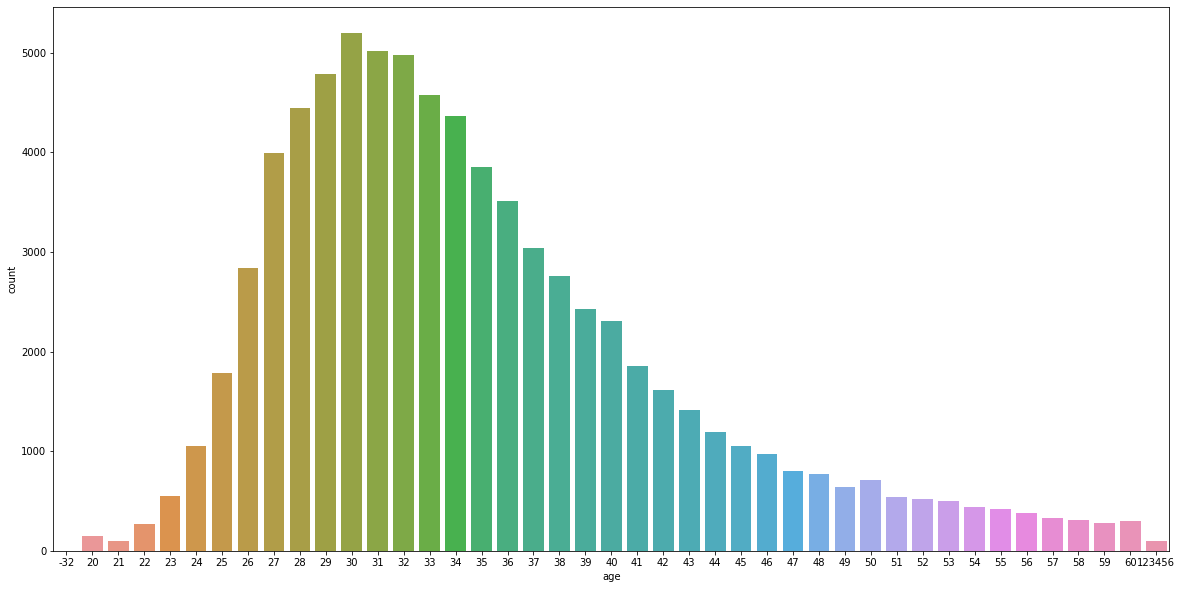

In [41]:
plt.figure(figsize=[20,10])
sns.countplot(x='age', data=ds)
plt.show()

Vamos a partir do gráfico que temos dois valores outliers importantes.

In [42]:
nenem = ds[ds['age'] == -32].shape[0]
veio = ds[ds['age'] == 123456].shape[0]
print(f'Existem {nenem} linhas com a idade "-32" e {veio} linhas com a idade "123456".')

Existem 3 linhas com a idade "-32" e 96 linhas com a idade "123456".


Como são poucas linhas, podemos removê-las.

In [43]:
ds = ds[0 < ds['age']]
ds = ds[ds['age'] <= 60]

Vemos que os valores mínimo e máximo agora fazem mais sentido.

In [44]:
ds['age'].describe()

count    77037.000000
mean        34.859444
std          7.623293
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

####"Previous year rating"

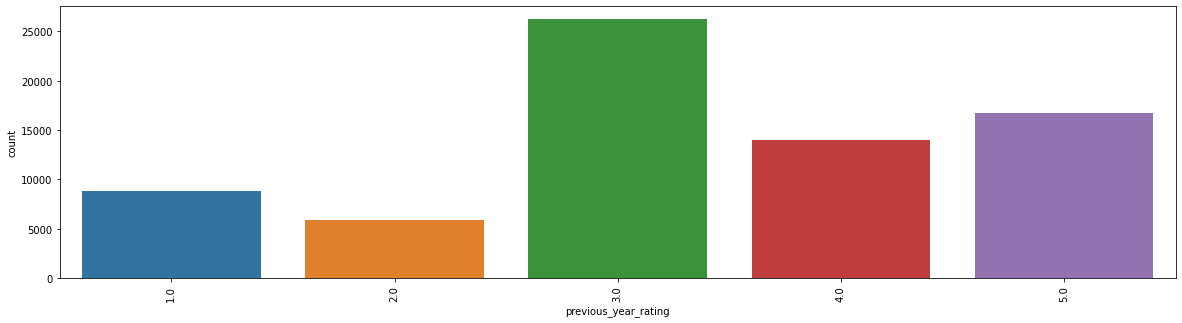

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(x='previous_year_rating', data=ds)
plt.xticks(rotation=90)
plt.show()

In [46]:
print("'previous_year_rating' column unique values:")
print(pd.Series(ds.previous_year_rating.unique()), end='\n\n')

'previous_year_rating' column unique values:
0    5.0
1    3.0
2    1.0
3    4.0
4    NaN
5    2.0
dtype: float64



Dados faltantes

In [47]:
ds['previous_year_rating'].isnull().sum() #Número de observações com esta feature faltando

5327

Não podemos supor que os dados faltantes se devem ao fato de não se poder atribuir um rating aos empregados por serem novos, uma vez que todos possuem ao menos 1 ano de serviço. Além disso, não podemos dropar as linhas, já que seriam uma perda muito grande. Desse modo, julgou-se melhor substituí-las pela moda.

In [48]:
#Sabemos que a mediana é 3.0 a partir das estatísticas fornecidas pelo método describe
mediana_previous = 3.0
ds = ds.fillna(value={'previous_year_rating': mediana_previous})

In [49]:
ds['previous_year_rating'].isnull().sum()

0

In [50]:
print("'previous_year_rating' column unique values:")
print(pd.Series(ds.previous_year_rating.unique()), end='\n\n')

'previous_year_rating' column unique values:
0    5.0
1    3.0
2    1.0
3    4.0
4    2.0
dtype: float64



####"Average training score"

In [51]:
ds['avg_training_score'].sort_values().unique()

array([39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99., nan])

Vemos que esta feature não possui nenhum valor absurdo, mas que tem dados faltantes

In [52]:
ds['avg_training_score'].isnull().sum()

6922

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


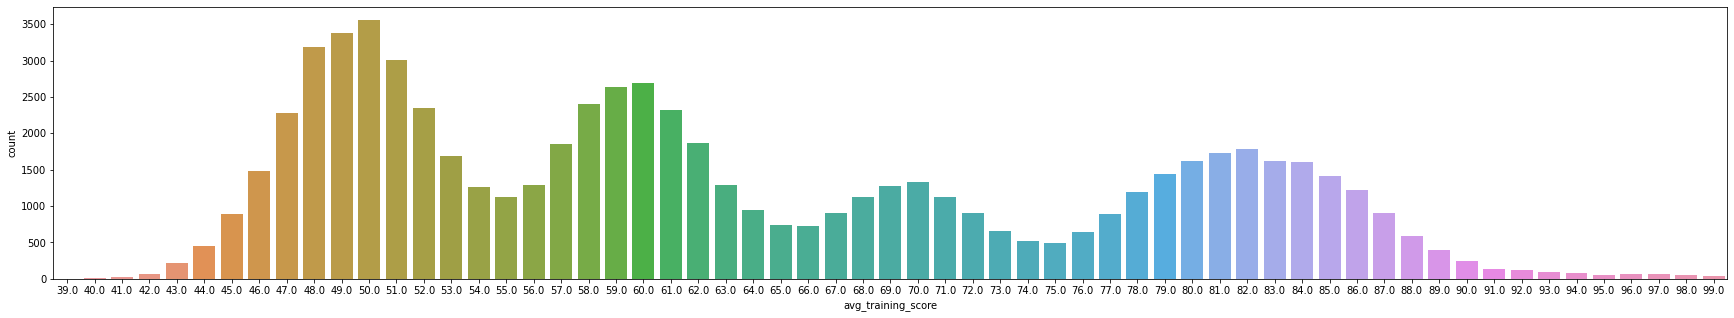

In [53]:
plt.figure(figsize=(30,5))
sns.countplot('avg_training_score', data=ds)
plt.show()

Ainda que tenhamos muitas linhas com dados faltantes, julgou-se melhor, olhando para distribuição desta feature, removê-las, uma vez que se substiuirmos os valores, a distribuição mudaria demais, podendo afetar o desempenho dos modelos de predição.

In [54]:
ds = ds.dropna(subset=['avg_training_score'])

In [55]:
ds['avg_training_score'].isnull().sum()

0

In [56]:
ds['avg_training_score'].sort_values().unique()

array([39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

##Separando os Datasets

In [57]:
ds.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0.0
65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0.0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0.0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0.0
48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0.0


In [58]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70115 entries, 65438 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            70115 non-null  object 
 1   region                70115 non-null  object 
 2   education             70115 non-null  object 
 3   gender                70115 non-null  object 
 4   recruitment_channel   70115 non-null  object 
 5   no_of_trainings       70115 non-null  float64
 6   age                   70115 non-null  int64  
 7   previous_year_rating  70115 non-null  float64
 8   length_of_service     70115 non-null  int64  
 9   awards_won?           70115 non-null  int64  
 10  avg_training_score    70115 non-null  float64
 11  is_promoted           47016 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 7.0+ MB


Separando os datasets

In [59]:
#Lembrando que sabiamos que o "employee_id" da última linha do dataset de treino 
#era 51526 e o primeiro do dataset de teste era 8724
ds_treino2 = ds.loc[:51526]
ds_teste2 = ds.loc[8724:]

Resetando o index de ambos os datasets

In [60]:
ds_treino2 = ds_treino2.reset_index()
ds_teste2 = ds_teste2.reset_index()

In [61]:
ds_treino2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47016 entries, 0 to 47015
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           47016 non-null  int64  
 1   department            47016 non-null  object 
 2   region                47016 non-null  object 
 3   education             47016 non-null  object 
 4   gender                47016 non-null  object 
 5   recruitment_channel   47016 non-null  object 
 6   no_of_trainings       47016 non-null  float64
 7   age                   47016 non-null  int64  
 8   previous_year_rating  47016 non-null  float64
 9   length_of_service     47016 non-null  int64  
 10  awards_won?           47016 non-null  int64  
 11  avg_training_score    47016 non-null  float64
 12  is_promoted           47016 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 4.7+ MB


In [62]:
ds_teste2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23099 non-null  int64  
 1   department            23099 non-null  object 
 2   region                23099 non-null  object 
 3   education             23099 non-null  object 
 4   gender                23099 non-null  object 
 5   recruitment_channel   23099 non-null  object 
 6   no_of_trainings       23099 non-null  float64
 7   age                   23099 non-null  int64  
 8   previous_year_rating  23099 non-null  float64
 9   length_of_service     23099 non-null  int64  
 10  awards_won?           23099 non-null  int64  
 11  avg_training_score    23099 non-null  float64
 12  is_promoted           0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.3+ MB


Retirando a coluna target do dataset de teste

In [63]:
del ds_teste2['is_promoted']

In [64]:
ds_teste2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23099 non-null  int64  
 1   department            23099 non-null  object 
 2   region                23099 non-null  object 
 3   education             23099 non-null  object 
 4   gender                23099 non-null  object 
 5   recruitment_channel   23099 non-null  object 
 6   no_of_trainings       23099 non-null  float64
 7   age                   23099 non-null  int64  
 8   previous_year_rating  23099 non-null  float64
 9   length_of_service     23099 non-null  int64  
 10  awards_won?           23099 non-null  int64  
 11  avg_training_score    23099 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


Transformando os datasets em csv's

In [65]:
ds_treino2.to_csv('train_clean.csv', index= False)
ds_teste2.to_csv('test_clean.csv', index=False)